# Primena kvantne Furijeove transformacije u programskom jeziku Python


### Uvod

**Kvantna Furijeova transformacija** (KFT) je linearna transformacija kvantnih bitova i predstavlja kvantnu analogiju 
inverzne diskretne Furijeove transformacije. KFT je deo mnogih kvantnih algoritama, od kojih se ističu *Šorov algoritam*
za faktorizaciju i izračunavanje diskretnog logaritma, *algoritam za određivanje kvantne faze* koji računa sopstvene
vrednosti unitarne matrice, i *algoritam za rešavanje problema skrivenih podgrupa*. KFT je otkrio kriptograf Don
Kopersmit *(Don Coppersmith)*.

KFT može efikasno biti primenjena na kvantnom računaru pomoću dekompozicije u proizvod jednostavnijih
unitarnih matrica. Koristeći jednostavnu dekompoziciju, diskretna Furijeova transformacija (DFT) sa $2^n$ amplituda
može biti implementirana kao kvantno kolo od samo $O(n^2)$ Hadamardovih gejtova i gejtova kontrolisanog faznog pomeraja, 
pri čemu je $n$ broj kvantnih bitova. Ovo je znatno efikasnije u odnosu na standardnu diskretnu Furijeovu transformaciju 
koja zahteva $O(n2^n)$ gejtova, gde je $n$ broj bitova, što je eksponencijalne složenosti.
Ipak, KFT deluje nad kvantnim stanjem, dok standardna DFT deluje nad vektorom, tako da DFT ne može u svakom problemu 
iskoristiti ovo eksponencijalno ubrzanje. 

Najbolji kvantni algoritmi Furijeove transformacije zahtevaju samo 
$O(n\log n)$ gejtova za efikasno rešenje. 

In [3]:
from astro_qf import quantum as qt
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

Za potrebe projekta implementiran je modul *quantum* koji sadrži klase za rad sa kompleksnim brojevima, kjubitima,
kjubitima na Blohovoj sferi, funkcije za generisanje tačaka u vidu geometrijskih oblika, funkciju za
generisanje šuma i funkciju kvantne Furijeove transformacije. Sve funkcije su ručno implementirane, **bez
upotrebe dodatnih biblioteka** (poput numpy, QuTiP, ...)

### Klasa  *Complex*

Sadrži sve osnovne funkcije za kreiranje kompleksnih brojeva i operacije nad njima.

##### Kreiranje:

In [2]:
z1 = qt.Complex(-3, 4)
z2 = qt.Complex(-0.5, 1.5)
z3 = qt.Complex(0, -1)
z4 = qt.Complex(1, 0)

print(f'z1 = {z1}')
print(f'z2 = {z2}')
print(f'z3 = {z3}')
print(f'z4 = {z4}')

z1 = -3 + 4i
z2 = -0.5 + 1.5i
z3 = -i
z4 = 1


##### Opšte operacije:

In [3]:
print(f'|z1| = {z1.modulus()}')
print(f'-z1 = {-z1}')
print(f'z1 konjugovano: {z1.conjugate()}')
print(f'arg(z1) = {z1.arg()}')
print(f'abs(z1) = {abs(z1)}')
print(f'Trigonometrijski oblik z1: {z1.trigform()}')
print(f'Indeksiranje: z1[0]={z1[0]}, z1[-1]={z1[-1]}')
print(f'Poredjenje: z1 == z2 -> {z1 == z2}, 1 == z4 -> {1 == z4}, z3 != z4 -> {z3 != z4}')

|z1| = 5.0
-z1 = 3 - 4i
z1 konjugovano: -3 - 4i
arg(z1) = 2.214297435588181
abs(z1) = 3 + 4i
Trigonometrijski oblik z1: 5.0*(cos(126.87) + i*sin(126.87))
Indeksiranje: z1[0]=-3, z1[-1]=4
Poredjenje: z1 == z2 -> False, 1 == z4 -> True, z3 != z4 -> True


##### Aritmetičke operacije:

In [4]:
print(f'z1 + z2 = {z1 + z2}')
print(f'z1 - z2 = {z1 - z2}')
print(f'z1 * z2 = {z1 * z2}')
print(f'z1 / z2 = {z1 / z2}\n')

z3 += 4.15
z4 -= qt.Complex(2, 2)
print(f'(z3 += 4.15): z3 = {z3}')
print(f'(z4 -= (2 + 2i): z4 = {z4}')

z3 *= qt.Complex(0, 1)
z4 /= 2
print(f'(z3 *= i): z3 = {z3}')
print(f'(z4 /= 2): z4 = {z4}\n')

print(f'z1^2 = {z1 ** 2}')
print(f'z1^0.5 = {z1 ** 0.5}\n')

zs = [qt.Complex(1, 1), qt.Complex(2, 2), qt.Complex(), qt.Complex(3, 3)]
print(f'Suma [(1 + i), (2 + 2i), 0, (3 + 3i)]: {qt.Complex.csum(zs)}')

z1 + z2 = -3.5 + 5.5i
z1 - z2 = -2.5 + 2.5i
z1 * z2 = -4.5 - 6.5i
z1 / z2 = 3.0 + i

(z3 += 4.15): z3 = 4.15 - i
(z4 -= (2 + 2i): z4 = -1 - 2i
(z3 *= i): z3 = 1.0 + i
(z4 /= 2): z4 = -0.5 - i

z1^2 = -7.0 - 24.0i
z1^0.5 = 1.0 + 2.0i

Suma [(1 + i), (2 + 2i), 0, (3 + 3i)]: 6 + 6i


##### Ostale funkcije:

In [5]:
print(f'sin(z1) = {z1.sin()}')
print(f'cos(z1) = {z1.cos()}')
print(f'Nasumican kompleksan broj izmedju 2, 4: {qt.Complex.random(2, 4)}')
print('Lista nasumicnih kompleksnih brojeva:')
print(qt.Complex.randlist(size=10, start=-5, stop=1))

sin(z1) = -3.854 - 27.017i
cos(z1) = -27.035 + 3.851i
Nasumican kompleksan broj izmedju 2, 4: 3.469 + 3.921i
Lista nasumicnih kompleksnih brojeva:
[-2.031 - 3.379i, -1.526 - 2.46i, -2.791 + 0.62i, -2.791 - 0.907i, -4.585 - 3.22i, -2.068 - 0.58i, -0.235 - 2.326i, -2.616 - 0.272i, -4.247 - 1.456i, -0.018 - 0.944i]


Funkcije za generisanje tačaka koje predstavljaju poznate geometrijske oblike kao i funkcije za iscrtavanje
biće prikazane kasnije.

### Klasa *ComplexTrig*

Ova klasa nasleđuje klasu *quantum.Complex* i dozvoljava kreiranje kompleksnog broja pomoću trigonometrijskog oblika,
odnosno pomoću dužine vektora $r$ i ugla $\phi$ koji on zaklapa sa pozitivnim delom x-ose.

In [6]:
z1 = qt.ComplexTrig(np.pi / 4, 1)
z2 = qt.ComplexTrig(-np.pi / 2, 3)

print(f'z1 = {z1.trigform()}')
print(f'z2 = {z2.trigform()}')

z1 = 1.0*(cos(45.0) + i*sin(45.0))
z2 = 3.0*(cos(270.0) + i*sin(270.0))


### Klasa *Qubit*

Sadrži osnovne funkcionalnosti za rad sa kvantnim bitovima.

Za razliku od običnog bita, **kjubit** može biti u stanju $0$, $1$ ili biti *kvantna superpozicija* ova dva stanja,
odnosno zbir prethodna dva stanja. To znači da se kjubit ne nalazi ni u jednom ni u drugom stanju, već da se javlja
u jednom od ova dva stanja sa određenom verovatnoćom, nakon merenja.

U opštem slučaju, za $n$ kjubita
postoji $2^n$ stanja. Za stanje kjubita koristi se Dirakova *bra-ket* notacija:

$|\psi$> $ = \alpha|0$> $ + \beta|1$> $, |\alpha|^2 + |\beta|^2 = 1$

Kvadrati koeficijenata (kvadrati modula u slučaju kompleksnih brojeva) koji stoje uz vrednosti bitova predstavljaju 
raspodelu verovatnoća da se kjubit nađe u datom stanju. Dakle, zbir ovih vrednosti daje vrednost 1.

Matematički, kjubit je normirani kompleksni vektor iz Hilbertovog prostora $C^N$ i može se napisati matrično:

$|\psi$> $ = \alpha \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \beta \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}$

Kjubit se nakon *merenja* može naći samo u jednom stanju čime stanje superpozicije biva narušeno 
(Šredingerov eksperiment). Matematički, merenje kjubita je predstavljeno dejstvom matrice na vektorsku 
reprezentaciju stanja kjubita. Na primer, izraz za merenje kjubita u stanju 0 je oblika:

$M_0|\psi $> $ =
\begin{bmatrix}
1 && 0 \\
0 && 0
\end{bmatrix}
(\alpha
\begin{bmatrix}
1 \\
0
\end{bmatrix}
+ \beta
\begin{bmatrix}
0 \\
1
\end{bmatrix}
) = 
\begin{bmatrix}
\alpha \\
0
\end{bmatrix}$

i analogno za stanje $1$:

$M_1|\psi $> $ = 
\begin{bmatrix}
0 && 0 \\
0 && 1
\end{bmatrix}
|\psi $> $ =
\begin{bmatrix}
0 \\
\beta
\end{bmatrix}$

Zanimljivo je napomenuti da je Google nedavno, koristeći 53 kjubita u svom kvantnom računaru, rešio kompleksan problem
za 200 sekundi za koji je najjačem poznatom superračunaru potrebno približno 10.000 godina!

#### Primeri

In [2]:
q1 = qt.Qubit([qt.Complex(1 / np.sqrt(2), 0), qt.Complex(1 / np.sqrt(2), 0)])
q2 = qt.Qubit([
    qt.Complex(0.5, 0),
    qt.Complex(0, -0.5),
    qt.Complex(-0.5, 0),
    qt.Complex(0, 0.5)
])

print(f'q1 = {q1}')
print(f'q2 = {q2}')

q1 = 0.707|0> + 0.707|1>
q2 = 0.5|00> - 0.5i|01> - 0.5|10> + 0.5i|11>


Klasa *Qubit* dinamički određuje stanje kjubita na osnovu dužine prosleđene liste koeficijenata,
a zatim je automatski normalizuje.

In [8]:
q3 = qt.Qubit([
    qt.Complex(150, -342),
    qt.Complex(-105.232, 0.15),
    qt.Complex(15, 130.013)
])

print(f'q3 = {q3}')
print(f'Suma verovatnoca: {q3.sum()}\n')
print(f'q3[-1] = {q3[-1]} (koeficijent uz |11> je 0)')

q3 = (0.366 - 0.835i)|00> - 0.257|01> + (0.037 + 0.318i)|10>
Suma verovatnoca: 0.9999999999999998

q3[-1] = 0 (koeficijent uz |11> je 0)


##### Simulacija merenja kjubita

Ponovićemo merenje istog kjubita (veštački) 10000 puta kako bismo utvrdili da kjubit $''$upada$''$ u stanje
srazmerno sa verovatnoćom uz odgovarajuće stanje. Za kjubit

$|\psi$> $ = \frac{1}{2}|00$> $- \frac{i}{2}|01$> $- \frac{1}{2}|10$> $+ \frac{i}{2}|11$>

očekujemo da uzme približno jednake vrednosti 00, 01, 10 i 11, jer su sve verovatnoće jednake $\frac{1}{4}$.

In [9]:
s = q2.sample(10000)
qt.Qubit.print_sample(s)

00: 2486
01: 2415
10: 2570
11: 2529


Vidimo da se kjubit našao u svakom stanju približno jednak broj puta.
Prethodno merenje je $''$veštačko$''$ jer se kjubit nakon merenja može naći samo u izmerenom stanju, u kome
ostaje nepromenjen. Izmerićemo kjubit nakon prvog merenja i utvrditi prethodno tvrđenje.

In [3]:
print('Prvo merenje:')
q2.measure()
print(q2)

print('\nNakon prvog merenja, merimo kjubit jos 3 puta:')
q2.measure()
print(q2)

q2.measure()
print(q2)

q2.measure()
print(q2)

Prvo merenje:
|01>

Nakon prvog merenja, merimo kjubit jos 3 puta:
|01>
|01>
|01>


Kjubit sa nasumičnim koeficijentima i lista nasumičnih kjubita:

In [12]:
q = qt.Qubit.random(4)
print(q)
print()

qs = qt.Qubit.randlist(7, 2)
print(qs)

(-0.139 - 0.022i)|00> + (0.476 + 0.391i)|01> + (0.243 + 0.214i)|10> + (0.606 - 0.359i)|11>

[(0.496 + 0.409i)|0> + (-0.176 - 0.745i)|1>, (-0.484 + 0.402i)|0> + (0.744 - 0.225i)|1>, (0.24 - 0.467i)|0> + (-0.517 - 0.676i)|1>, (-0.089 + 0.338i)|0> + (0.483 + 0.802i)|1>, (0.953 + 0.015i)|0> + (-0.27 + 0.135i)|1>, (-0.639 + 0.464i)|0> + (0.279 - 0.546i)|1>, (-0.279 + 0.268i)|0> + (0.316 + 0.866i)|1>]


### Klasa QubitBloch

Kjubit može biti predstavljen na Blohovoj sferi:

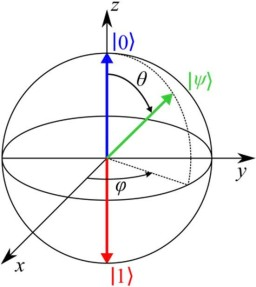

In [2]:
display(Image(filename='Bloch-sphere-representation-of-a-qubit.jpg'))
# img = Image.open('Bloch_sphere.png')
# plt.imshow(img)

In [2]:
qt.QubitBloch.init_sphere(points=400)

Stanje kjubita na Blohovoj sferi je određeno izrazom:

$|\psi$> $ = cos\frac{\theta}{2}|0$> $ + e^{i\phi}sin\frac{\theta}{2}|1$>

Kreiraćemo najpre kjubit sa uglovima $\theta=-\frac{\pi}{2}, \phi=2\pi$.

In [4]:
q = qt.QubitBloch(theta=-np.pi/2, phi=2*np.pi)
print(f'q = {q}')
print(f'q.theta = {q.theta}, q.phi = {q.phi}')

q = 0.707|0> - 0.707|1>
q.theta = -1.5707963267948966, q.phi = 6.283185307179586


Generisaćemo nasumično 20 kjubita i prikazati ih na Blohovoj sferi.

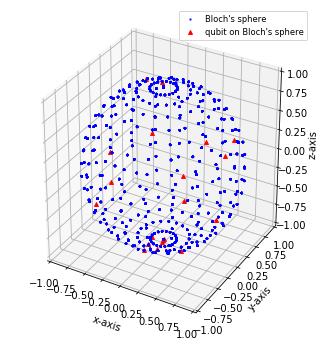

In [3]:
fig = plt.figure()
fig_size = plt.gcf()
fig_size.set_size_inches(12, 6)

ax = fig.add_subplot(121, projection='3d')

rand_qubits = qt.QubitBloch.randlist(20)
for rq in rand_qubits:
    rq.show(ax, s=15, sphere_s=2, sphere_alpha=0.7)

### Kvantna Furijeova transformacija

Kvantna Furijeova transformacija se primenjuje nad skupom realnih ili kompleksnih brojeva veličine $N$.
Neka je dat vektor $c = (c_0, c_1, ... , c_{N-1})$. Tada je Kvantna Furijeova transformacija koeficijenta 
na poziciji $k$ data formulom:

$c_k = \frac{1}{N}\sum_{j=0}^{N-1} e^{2\pi i \frac{jk}{N}}$ $, k = 0, 1, ... , N-1$

KFT može biti prikazana i kao unitarna matrica koja deluje na kvantno stanje:

$F_N = \frac{1}{\sqrt N} \begin{bmatrix}
1 && 1 && 1 && 1 && ... && 1 \\
1 && w && w^2 && w^3 && ... && w^{N-1} \\
1 && w^2 && w^4 && w^6 && ... && w^{2(N-1)} \\
1 && w^3 && w^6 && w^9 && ... && w^{3(N-1)} \\
&& ... \\
1 && w^{N-1} && w^{2(N-1)} && w^{3(N-1)} && ... && w^{(N-1)(N-1)}
\end{bmatrix}$

gde je $w^N = 1$  $N$-ti primitivni koren jedinice, ili kao kvantno kolo:

##### Implementacija KFT pomoću Hadamardovih gejtova i gejtova kontrolisanog faznog pomeraja za $n$ kjubita:

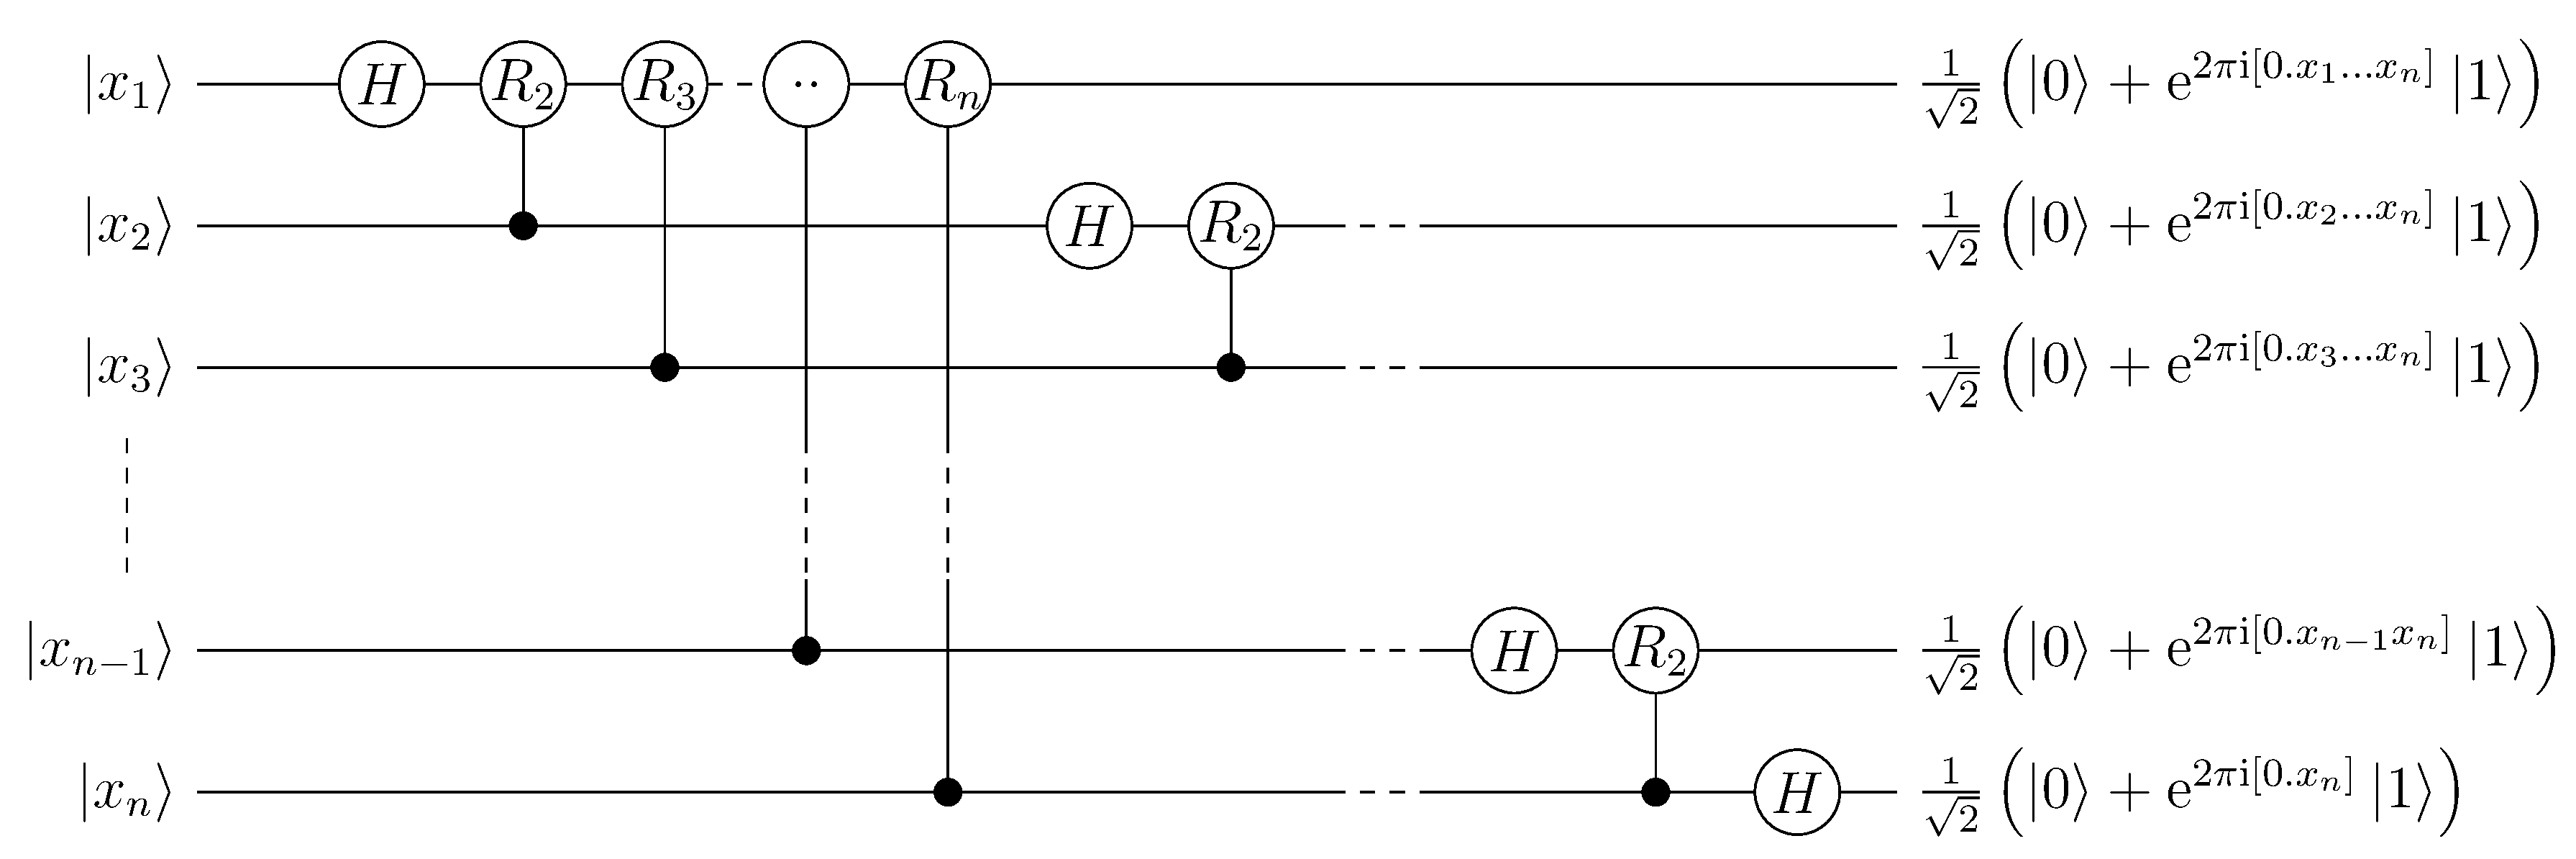

In [2]:
display(Image(filename='Q_fourier_nqubits.png'))

#### Primeri primene

Najpre ćemo transformisati proizvoljan skup kompleksnih brojeva i prikazati rezultat.
Na drugoj slici ćemo transformisati 4 kjubita u stanju superpozicije ($2^4$ koeficijenata), pri čemu će
sve verovatnoće biti jednake, tj. $\frac{1}{16}$.

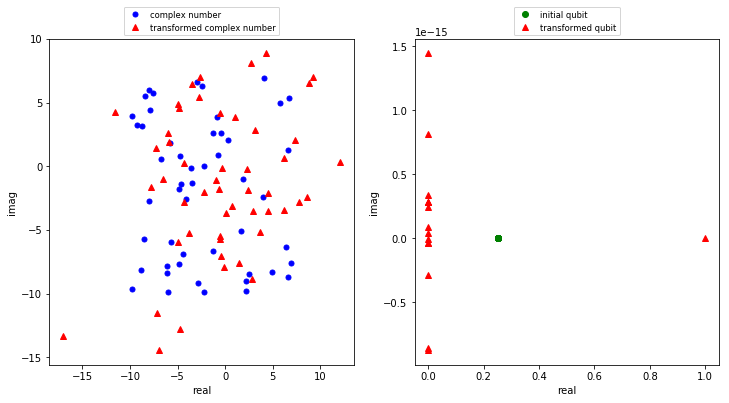

In [16]:
complex_li = qt.Complex.randlist(size=50, start=-10, stop=7)
complex_li_transformed = qt.qft(complex_li)

q = qt.Qubit([qt.Complex(0.25, 0)] * 16)
q_transformed = qt.qft(q)

fig_size = plt.gcf()
fig_size.set_size_inches(12, 6)

plt.figure(1)

# complex, transformed complex
plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

qt.Complex.plot(complex_li, label='complex number', markersize=5)
qt.Complex.plot(complex_li_transformed, 'r^', 'transformed complex number')

plt.legend(loc='upper center', fontsize='small', bbox_to_anchor=(0.5, 1.111))

# qubit, transformed qubit
plt.subplot(122)
plt.xlabel('real')
plt.ylabel('imag')

qt.Qubit.plot(q, 'go', label='initial qubit')
qt.Qubit.plot(q_transformed, 'r^', 'transformed qubit')

plt.legend(loc='upper center', fontsize='small', bbox_to_anchor=(0.5, 1.111))

plt.show()

Kod transformacije proizvoljnih kompleksnih brojeva nije moguće uočiti nikakav obrazac - transformacija
je takođe manje-više proizvoljna. Transformacija 4 kvantna bita u stanju superpozicije kod kojih su koeficijenti
svi jednaki sadrži šablon - svi realni delovi (osim jednog) su postali 0, dok imaginarni variraju između
nekog intervala.

Transformisaćemo sinusoidu sa slučajnim šumom. Za generisanje šuma korišćena je funkcija *noise* koja pomera tekuću
vrednost sinusoide najviše do zadate amplitude, sa + ili - znakom, pri čemu frekvencija šuma ne mora biti stoprocentna.
U primeru je korišćen maksimalni pomeraj (amplituda) 1 i frekvencija distorzije signala od 100%.

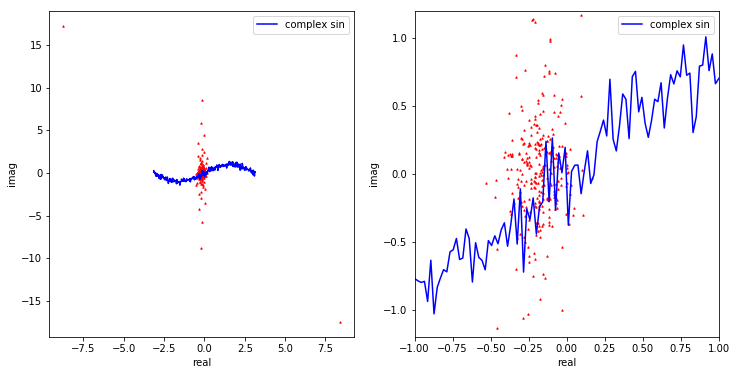

In [7]:
fig_size = plt.gcf()
fig_size.set_size_inches(12, 6)

plt.figure(1)

x = np.linspace(-np.pi, np.pi, 300)
cpl = [qt.Complex(xi, np.sin(xi) + qt.noise()) for xi in x]
cpl_transformed = qt.qft(cpl)

plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

qt.Complex.plot(cpl, color_string='blue', label='complex sin')
qt.Complex.scatter(cpl_transformed, marker='^', c='red')

plt.legend()

plt.subplot(122)
plt.xlabel('real')
plt.ylabel('imag')

plt.xlim(-1, 1)
plt.ylim(-1.2, 1.2)

qt.Complex.plot(cpl, color_string='blue', label='complex sin')
qt.Complex.scatter(cpl_transformed, marker='^', c='red')

plt.legend()
plt.show()

Transformacija sinusoide sa amplitudom 3 i frekvencijom distorzije 70% na intervalu $[-2\pi, 2\pi]$:

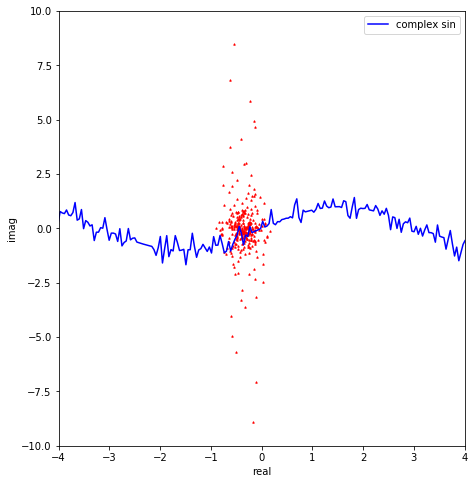

In [12]:
fig_size = plt.gcf()
fig_size.set_size_inches(16, 8)

x = np.linspace(-2 * np.pi, 2 * np.pi, 300)
cpl = [qt.Complex(xi, np.sin(xi) + qt.noise(amp=3, amp_scale=2, noise_freq=70)) for xi in x]
cpl_transformed = qt.qft(cpl)

plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

plt.xlim(-4, 4)
plt.ylim(-10, 10)

qt.Complex.plot(cpl, color_string='blue', label='complex sin')
qt.Complex.scatter(cpl_transformed, s=2, c='r', marker='^')

plt.legend()
plt.show()

Jasno je da realni delovi konvergiraju ka nuli, dok imaginarni i dalje variraju u intervalu
$[-y_{max}, y_{max}]$, odnosno između negativne i pozitivne amplitude.

Pokušaćemo sada da $''$uhvatimo$''$ obrasce transformacije nad poznatim geometrijskim oblicima - 
kvadratom, krugom i trouglom.

#### Kvadrat

Transformisaćemo kvadrat sa centrom u tački (0, 1) stranice 4, koji će sadržati ukupno 250 tačaka na ivicama.

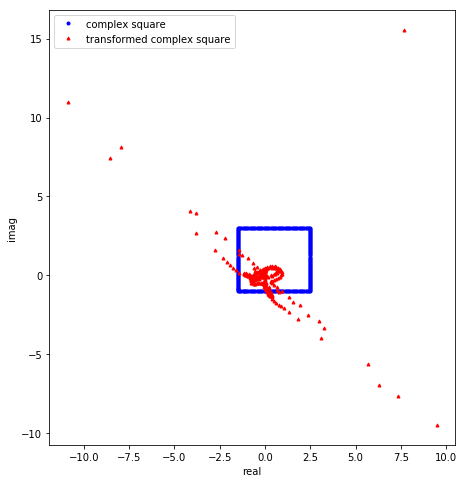

In [19]:
fig_size = plt.gcf()
fig_size.set_size_inches(16, 8)

square = qt.Complex.create_square(center=(0.5, 1), edge=4, edge_points=250)
square_transformed = qt.qft(square)

plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

qt.Complex.plot(square, label='complex square', markersize=3)
qt.Complex.plot(square_transformed, 'r^', label='transformed complex square', markersize=3)

plt.legend()
plt.show()

Zarad bolje preglednosti, prikazaćemo još jednom uveličan crtež:

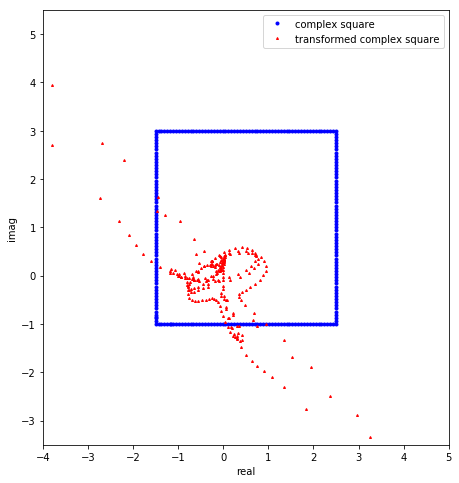

In [20]:
fig_size = plt.gcf()
fig_size.set_size_inches(16, 8)

plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

plt.xlim(-4, 5)
plt.ylim(-3.5, 5.5)

qt.Complex.plot(square, label='complex square', markersize=3)
qt.Complex.plot(square_transformed, 'r^', label='transformed complex square', markersize=2)

plt.legend()
plt.show()

Vidimo da u blizini centra kvadrata tačke poprimaju sinusoidni oblik., odnosno da se stranice kvadrata
na neki način $''$uvijaju$''$ u čvor.

#### Popunjeni kvadrat

Primenićemo sada KFT na isti kvadrat, samo sa popunom i sa nešto manja tačaka po spoljašnjoj ivici, 
i posmatrati rezultat transformacije.
Kod poziva funkcije *create_filled_square* broj zadatih tačaka se odnosi na **spoljašnje**
ivice kvadrata, dok broj i poziciju ostalih tačaka u unutrašnjosti kvadrata određuje algoritam.
U ovom primeru uzećemo manje spoljašnjih tačaka kako ukupan broj tačaka ne bi bio preveliki i crtež
ne bi postao potpuno nepregledan.

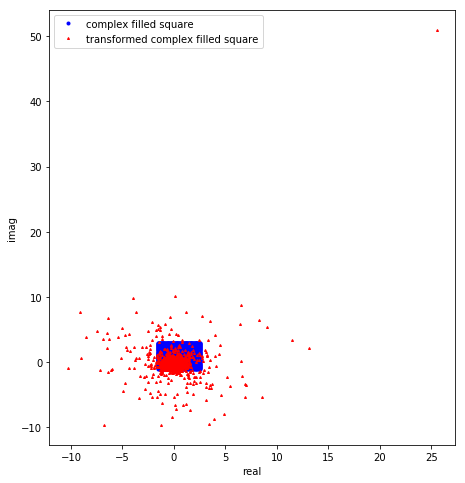

In [21]:
square_filled = qt.Complex.create_filled_square(center=(0.5, 1), edge=4, edge_points_outer=200)
square_filled_transformed = qt.qft(square_filled)

fig_size = plt.gcf()
fig_size.set_size_inches(16, 8)

plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

qt.Complex.plot(square_filled, label='complex filled square', markersize=3)
qt.Complex.plot(square_filled_transformed, 'r^', label='transformed complex filled square', markersize=2)

plt.legend()
plt.show()

Uveličan crtež:

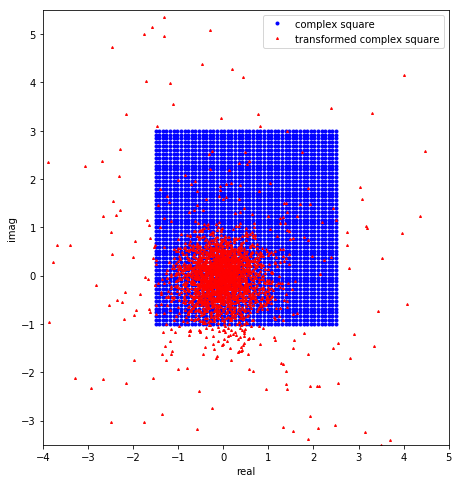

In [22]:
fig_size = plt.gcf()
fig_size.set_size_inches(16, 8)

plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

plt.xlim(-4, 5)
plt.ylim(-3.5, 5.5)

qt.Complex.plot(square_filled, label='complex square', markersize=3)
qt.Complex.plot(square_filled_transformed, 'r^', label='transformed complex square', markersize=2)

plt.legend()
plt.show()

#### Krug

Transformacija kruga sa centrom u (0, 0) poluprečnika 2 sa brojem tačaka po kružnici 150.


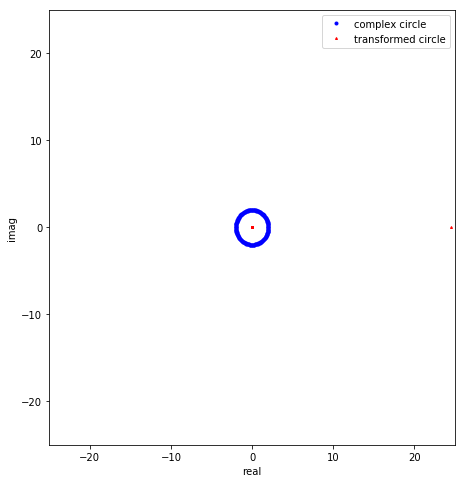

In [23]:
fig_size = plt.gcf()
fig_size.set_size_inches(16, 8)

plt.figure(1)

# circle, transformed circle
circle = qt.Complex.create_circle(radius=2, points=150)
circle_transformed = qt.qft(circle)

plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

plt.xlim(-25, 25)
plt.ylim(-25, 25)

qt.Complex.plot(circle, label='complex circle', markersize=3)
qt.Complex.plot(circle_transformed, 'r^', label='transformed circle', markersize=2)

plt.legend()
plt.show()

Vidimo da su sve transformisane tačke konvergiraju u centar kruga - osim poslednje tačke, koja je $''$izletela$''$
u tačku (24.85, 0)! Zbog ovog izletanja proporcije slike su narušene. Ako zanemarimo ovu tačku i uveličamo crtež,
dobijamo:

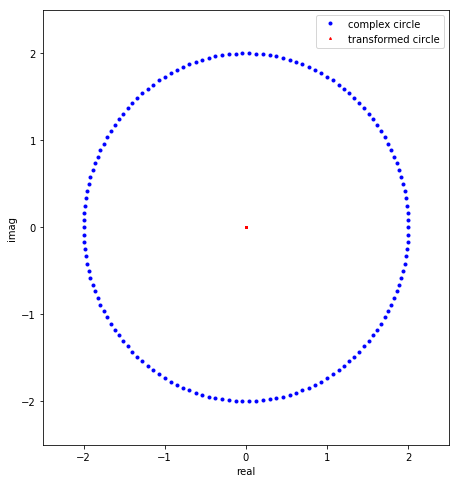

In [24]:
fig_size = plt.gcf()
fig_size.set_size_inches(16, 8)

plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

qt.Complex.plot(circle, label='complex circle', markersize=3)
qt.Complex.plot(circle_transformed, 'r^', label='transformed circle', markersize=2)

plt.legend()
plt.show()

#### Popunjeni krug

Transformisaćemo prethodni krug, samo sa popunom.

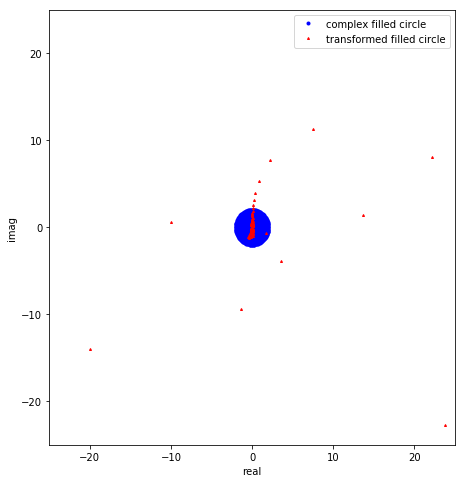

In [25]:
fig_size = plt.gcf()
fig_size.set_size_inches(16, 8)

plt.figure(1)

# filled circle, transformed filled circle
circle_filled = qt.Complex.create_filled_circle(radius=2, points_outer=150)
circle_filled_transformed = qt.qft(circle_filled)

plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

plt.xlim(-25, 25)
plt.ylim(-25, 25)

qt.Complex.plot(circle_filled, label='complex filled circle', markersize=3)
qt.Complex.plot(circle_filled_transformed, 'r^', label='transformed filled circle', markersize=2)

plt.legend()
plt.show()

Ponovo, radi preglednosti, prikazaćemo uveličani crtež i utvrditi da transformisane tačke konvergiraju ka
centru velikog kruga:

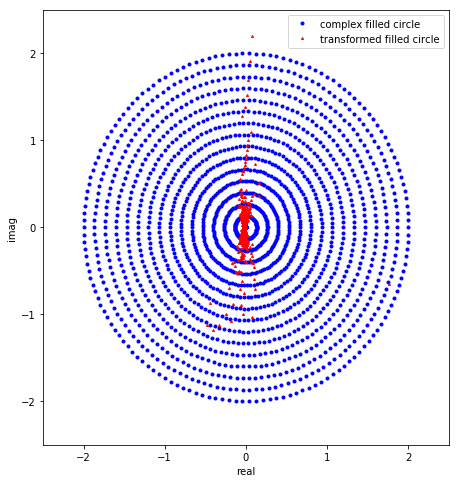

In [32]:
fig_size = plt.gcf()
fig_size.set_size_inches(16, 8)

plt.figure(1)

plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

qt.Complex.plot(circle_filled, label='complex filled circle', markersize=3)
qt.Complex.plot(circle_filled_transformed, 'r^', label='transformed filled circle', markersize=2)

plt.legend()
plt.show()

#### Trougao

Transformisaćemo proizvoljan nejednakostranični trougao sa temenima $A(-1.5, 0), C(3, 4), D(2, 7)$ i
brojem tačaka po svim stranicama 220.

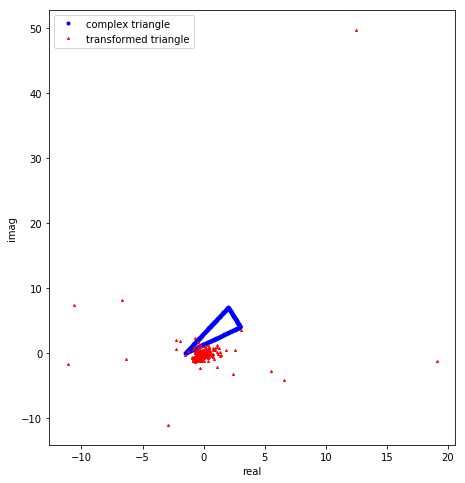

In [8]:
fig_size = plt.gcf()
fig_size.set_size_inches(16, 8)

plt.figure(1)

v1 = (-1.5, 0)
v2 = (3, 4)
v3 = (2, 7)

# triangle, transformed triangle
triangle = qt.Complex.create_triangle(v1, v2, v3, edge_points=220)
triangle_transformed = qt.qft(triangle)

plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

qt.Complex.plot(triangle, label='complex triangle', markersize=3)
qt.Complex.plot(triangle_transformed, 'r^', label='transformed triangle', markersize=2)

plt.legend()
plt.show()

Uveličano:

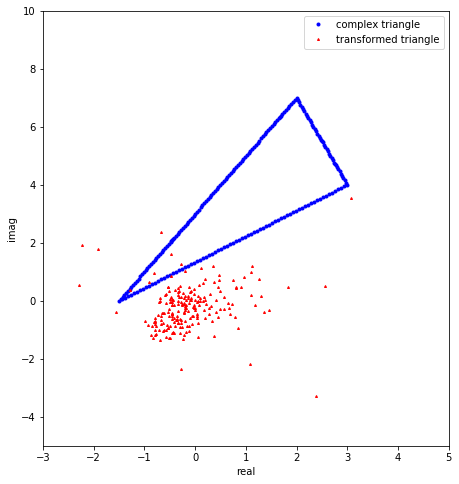

In [9]:
fig_size = plt.gcf()
fig_size.set_size_inches(16, 8)

plt.figure(1)

plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

plt.xlim(-3, 5)
plt.ylim(-5, 10)

qt.Complex.plot(triangle, label='complex triangle', markersize=3)
qt.Complex.plot(triangle_transformed, 'r^', label='transformed triangle', markersize=2)

plt.legend()
plt.show()

#### Popunjeni trougao

Transformisaćemo isti trougao, samo sa popunom. Zadati broj tačaka 
se odnosi na spoljašnji ivični trougao, dok broj unutrašnjih tačaka i njihove pozicije određuje algoritam.

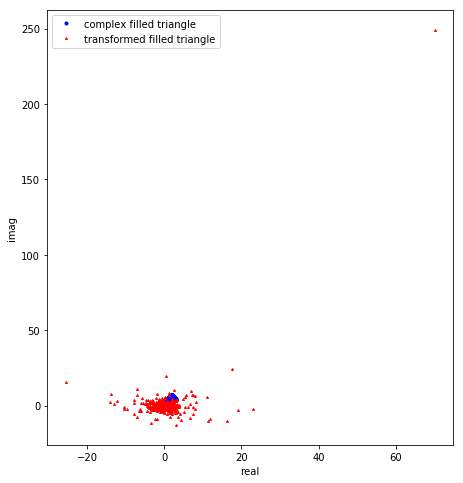

In [2]:
fig_size = plt.gcf()
fig_size.set_size_inches(16, 8)

plt.figure(1)

v1 = (-1.5, 0)
v2 = (3, 4)
v3 = (2, 7)

# filled triangle, transformed filled triangle
filled_triangle = qt.Complex.create_filled_triangle(v1, v2, v3, edge_points_outer=260)
triangle_filled_transformed = qt.qft(filled_triangle)

plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

qt.Complex.plot(filled_triangle, label='complex filled triangle', markersize=3)
qt.Complex.plot(triangle_filled_transformed, 'r^', label='transformed filled triangle', markersize=2)

plt.legend()
plt.show()

Uveličaćemo i ovaj crtež radi preglednosti:

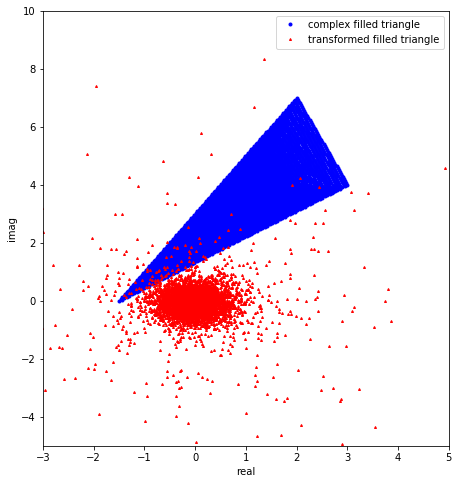

In [3]:
fig_size = plt.gcf()
fig_size.set_size_inches(16, 8)

plt.figure(1)

plt.subplot(121)
plt.xlabel('real')
plt.ylabel('imag')

plt.xlim(-3, 5)
plt.ylim(-5, 10)

qt.Complex.plot(filled_triangle, label='complex filled triangle', markersize=3)
qt.Complex.plot(triangle_filled_transformed, 'r^', label='transformed filled triangle', markersize=2)

plt.legend()
plt.show()

#### Sfera

Transformisaćemo 225 ravnomerno raspoređenih kjubita na Blohofoj sferi i posmatrati rezultat.

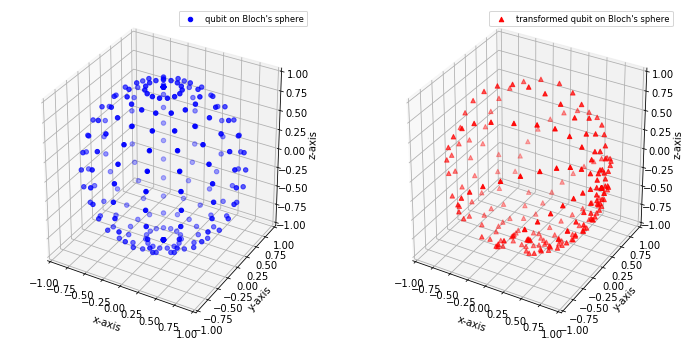

In [29]:
fig = plt.figure()
fig_size = plt.gcf()
fig_size.set_size_inches(12, 6)

ax = fig.add_subplot(121, projection='3d')

# qubit Bloch
qubit_sphere = qt.QubitBloch.create_sphere(points=225)
qt.QubitBloch.qscatter(qubit_sphere, ax, label='qubit on Bloch\'s sphere')

ax.set_zlim(-1, 1)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.legend(loc='upper right', fontsize='small')

# transformed qubit Bloch
ax_t = fig.add_subplot(122, projection='3d')

qsphere_transformed = qt.qft(qubit_sphere)
qt.QubitBloch.qscatter(qsphere_transformed, ax_t, color='r', marker='^', \
    label='transformed qubit on Bloch\'s sphere')

ax_t.set_zlim(-1, 1)
ax_t.set_xlim(-1, 1)
ax_t.set_ylim(-1, 1)

ax_t.set_xlabel('x-axis')
ax_t.set_ylabel('y-axis')
ax_t.set_zlabel('z-axis')

plt.legend(loc='upper right', fontsize='small')
plt.show()

Primećujemo da je sfera rotirana!

#### Elipsoid

S obzirom na nepostojanje kjubita na elipsoidu, ovaj primer služi samo kao uopštenje prethodnog primera - 
transformisani kjubiti su i dalje normalizovani, ali su samo **grafički** prikazani kao da pripadaju zadatom elipsoidu.
Korišćeni su koeficijenti $a = 15, b = 7, c = 10$ i broj tačaka 576.

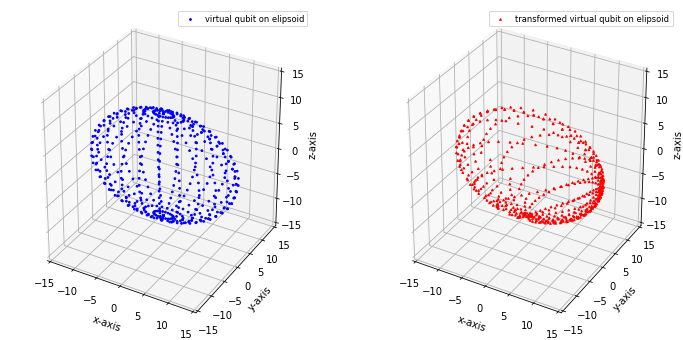

In [3]:
fig = plt.figure()
fig_size = plt.gcf()
fig_size.set_size_inches(12, 6)

ax = fig.add_subplot(121, projection='3d')

a = 15
b = 7
c = 10
qubit_elipsoid = qt.QubitBloch.create_elipsoid(a=a, b=b, c=c, points=576)
qt.QubitBloch.qscatter(qubit_elipsoid, ax, s=3, label='virtual qubit on elipsoid')

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.legend(loc='upper right', fontsize='small')

ax_t = fig.add_subplot(122, projection='3d')

qelipsoid_transformed = qt.qft(qubit_elipsoid)
qt.QubitBloch.qscatter(qelipsoid_transformed, ax_t, s=3, color='r', marker='^', \
                       label='transformed virtual qubit on elipsoid')

ax_t.set_xlabel('x-axis')
ax_t.set_ylabel('y-axis')
ax_t.set_zlabel('z-axis')

plt.legend(loc='upper right', fontsize='small')
plt.show()

#### Kocka

Za primenu kvantne Furijeove transformacije na kocku, potrebna nam je jedna dosetka. Pošto je primenjujemo nad 
kompleksnim brojevima, a kompleksni brojevi se ne mogu prikazati u prostoru, naizgled deluje nemoguće da se ovo izvede.
Međutim, moguće je primeniti transformaciju svake stranice kocke ponaosob, a zatim transformisane stranice iscrtati
u onoj ravni u kojoj se nalaze, pri čemu će jedna osa zadate ravni biti interpretirana kao imaginarna osa. Kombinacijom
6 transformisanih stranica kocke (6 crteža) dobićemo transformisanu virtualnu kompleksnu kocku u prostoru!

Za potrebe ovog primera, korišćena je kocka sa centrom u (0, 0, 0) stranice 2 i sa
brojem tačaka po spoljašnjim *ivicama* 200 (dakle, ovaj broj se ne odnosi za tačke koje pripadaju samim stranicama -
njih određuje interni algoritam).

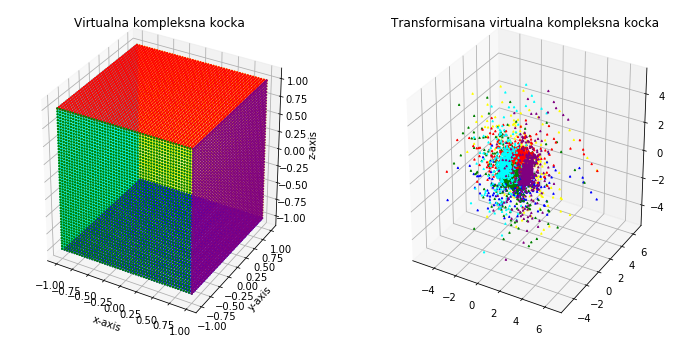

In [4]:
fig = plt.figure()
fig_size = plt.gcf()
fig_size.set_size_inches(12, 6)

ax = fig.add_subplot(121, projection='3d')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.title('Virtualna kompleksna kocka')
colors = ['blue', 'red', 'green', 'yellow', 'cyan', 'purple']

cube_data =  qt.Complex.create_cube_data(center=(0, 0, 0), edge=2, points_per_side_edge=200)
qt.Complex.plot_cube(cube_data, ax, colors=colors)

ax_t = fig.add_subplot(122, projection='3d')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.title('Transformisana virtualna kompleksna kocka')
markers = ['^'] * 6
alphas = [0.8] * 6

transformed_cube_data = (qt.qft(cube_data[0]), ) + cube_data[1:]
qt.Complex.plot_cube(transformed_cube_data, ax_t, colors=colors, markers=markers)

plt.show()

#### Reference:

[Šorov algoritam](https://en.wikipedia.org/wiki/Shor%27s_algorithm)

[Algoritam za određivanje kvantne faze](https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm)

[Detaljnije o KFT](https://medium.com/@jonathan_hui/qc-quantum-fourier-transform-45436f90a43)